In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df=pd.read_csv('E:/PepperFry/A_class_Storewise.csv')
df

,Date,Appu Art & Handicrafts,GANGADHAR RATANLAL FURNITURE SHOWROOM,HOME SENSE INTERNATIONAL,Manglam,Shree Sai Art Palace,Shree Sai Industries,SHRI HARI IRON UDHYOG,Vintej Home,Vishwakarma Antique,Vishwakarma Art Palace,WOODENMOOD
0,03-01-2019,17,9,58,12,4,0,19,5,0,0,0
1,10-01-2019,12,12,54,1,8,0,8,15,0,2,2
2,17-01-2019,13,6,56,0,4,0,0,22,0,5,2
3,24-01-2019,19,8,55,0,9,0,1,16,0,3,0
4,31-01-2019,19,13,33,4,9,3,9,22,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
57,06-02-2020,1,0,1,0,0,1,3,0,0,1,0
58,13-02-2020,0,0,1,0,0,0,2,2,0,2,0
59,20-02-2020,0,0,1,0,0,0,3,0,2,0,0
60,27-02-2020,0,0,4,0,0,0,1,1,1,0,0


In [61]:
df["Date"] = pd.to_datetime(df['Date'])
df.head(5)

,Date,Appu Art & Handicrafts,GANGADHAR RATANLAL FURNITURE SHOWROOM,HOME SENSE INTERNATIONAL,Manglam,Shree Sai Art Palace,Shree Sai Industries,SHRI HARI IRON UDHYOG,Vintej Home,Vishwakarma Antique,Vishwakarma Art Palace,WOODENMOOD
0,2019-03-01,17,9,58,12,4,0,19,5,0,0,0
1,2019-10-01,12,12,54,1,8,0,8,15,0,2,2
2,2019-01-17,13,6,56,0,4,0,0,22,0,5,2
3,2019-01-24,19,8,55,0,9,0,1,16,0,3,0
4,2019-01-31,19,13,33,4,9,3,9,22,0,2,0


In [62]:
df.set_index('Date',inplace=True)
df

,Appu Art & Handicrafts,GANGADHAR RATANLAL FURNITURE SHOWROOM,HOME SENSE INTERNATIONAL,Manglam,Shree Sai Art Palace,Shree Sai Industries,SHRI HARI IRON UDHYOG,Vintej Home,Vishwakarma Antique,Vishwakarma Art Palace,WOODENMOOD
Date,,,,,,,,,,,
2019-03-01,17,9,58,12,4,0,19,5,0,0,0
2019-10-01,12,12,54,1,8,0,8,15,0,2,2
2019-01-17,13,6,56,0,4,0,0,22,0,5,2
2019-01-24,19,8,55,0,9,0,1,16,0,3,0
2019-01-31,19,13,33,4,9,3,9,22,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02,1,0,1,0,0,1,3,0,0,1,0
2020-02-13,0,0,1,0,0,0,2,2,0,2,0
2020-02-20,0,0,1,0,0,0,3,0,2,0,0


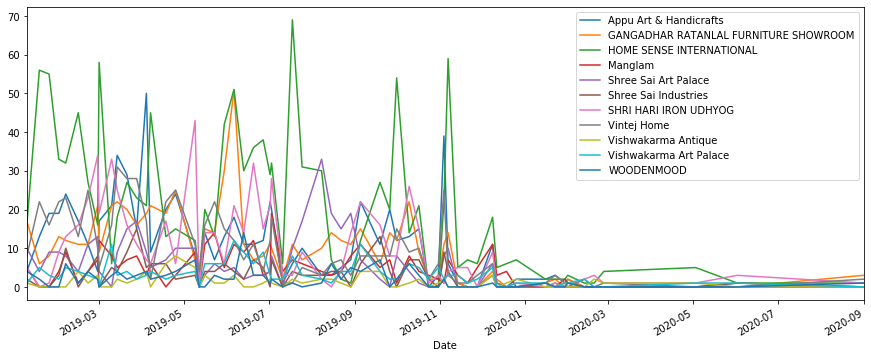

In [63]:
df.plot(figsize=(15, 6))

In [68]:

model=sm.tsa.statespace.SARIMAX(df.iloc[:,0],order=(1, 0, 0),seasonal_order=(1,0,1,4))
results=model.fit()

C:\Users\My PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\My PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


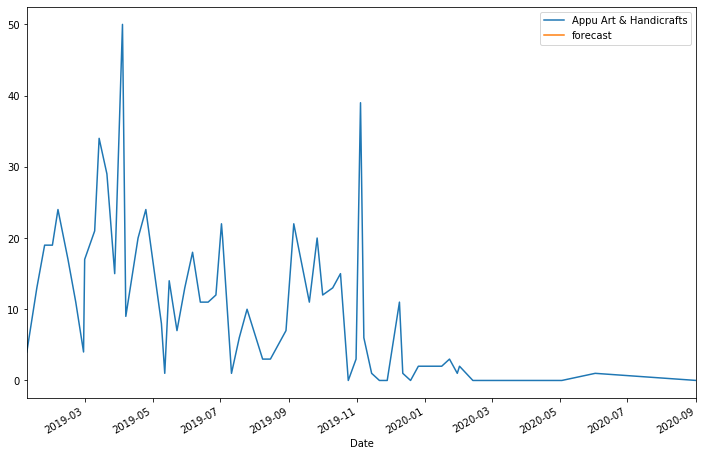

In [69]:

df['forecast']=results.predict(start=52,end=62,dynamic=True)
df[['Appu Art & Handicrafts','forecast']].plot(figsize=(12,8))

In [71]:
# running the forecast for all the SKU's
i=0
forecast = pd.DataFrame()
for i in range (0,10):
    model=sm.tsa.statespace.SARIMAX(df.iloc[:,i],order=(1, 0, 0),seasonal_order=(1,0,1,4))
    results=model.fit()
    forecast[i]= results.predict(start=62,end=82,dynamic=True)

C:\Users\My PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\My PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\My PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\My PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\My 

In [72]:
forecast

,0,1,2,3,4,5,6,7,8,9
62,-0.077742,0.064112,5.672256,0.976150,0.000522,-0.284126,0.683937,-0.257064,0.583429,1.084673
63,0.516602,0.446946,5.251775,1.176359,-0.000928,0.071431,0.806499,0.138918,0.935918,0.482594
64,0.288078,0.513413,4.653759,1.717766,-0.002107,0.230124,0.356218,-0.079331,0.732115,0.407556
65,0.368089,0.566590,4.172430,1.102166,-0.001137,0.612078,0.122343,-0.074063,0.559066,0.569987
66,0.214558,0.401890,4.538985,1.537969,-0.001024,0.126218,0.094387,0.075277,0.393605,0.692419
67,0.640781,0.584682,4.242419,1.454405,-0.000589,0.286740,0.024810,-0.137911,0.820978,0.288038
68,0.399807,0.557153,3.839387,1.804875,-0.000234,0.334988,0.049997,-0.011302,0.666424,0.257191
69,0.427473,0.550350,3.508807,1.143456,-0.000298,0.610618,0.055284,-0.009082,0.518324,0.392067
70,0.270528,0.382747,3.695408,1.499470,-0.000226,0.159067,0.039263,-0.087178,0.368129,0.491905
71,0.602254,0.514777,3.479997,1.393061,-0.000230,0.277722,0.034570,0.035189,0.775316,0.200859
